In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
df = pd.read_csv('C:/machine_learning/pyml/data/study_score_polynominal_regression.csv.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   hour    20 non-null     float64
 1   score   20 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 448.0 bytes


In [5]:
df.describe()

,hour,score
count,20.000000,20.000000
mean,2.870000,36.300000
std,1.454612,30.423502
min,0.200000,2.000000
25%,2.100000,9.000000
50%,3.150000,29.000000
75%,4.025000,55.000000
max,4.800000,100.000000


In [6]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [7]:
print(x)
print()
print(y)

    hour
0    0.2
1    0.5
2    0.8
3    0.9
4    1.2
5    2.4
6    2.5
7    2.6
8    2.9
9    3.1
10   3.2
11   3.3
12   3.7
13   3.9
14   4.0
15   4.1
16   4.2
17   4.4
18   4.7
19   4.8

0       2
1       4
2       6
3       4
4       6
5      14
6      10
7      12
8      24
9      26
10     32
11     46
12     44
13     52
14     58
15     54
16     68
17     80
18     84
19    100
Name: score, dtype: int64


In [8]:
#사이킷런 선형회귀 분석모델 객체 생성

from sklearn.linear_model import LinearRegression

reg = LinearRegression()

In [9]:
#훈련셋을 사이킷런 선형회귀모델에 토입해 학습시켜 예측모델 생성
reg.fit(x,y)


LinearRegression()

In [55]:

print('기울기: ',reg.coef_)
print('절편: ',reg.intercept_)


기울기:  [18.90403463]
절편:  -17.954579374160488


In [15]:
print(f'예측식: y = {reg.coef_[0]:.2f}x + {reg.intercept_:.2f}')

예측식: y = 18.90x + -17.95


In [17]:
y_pred = reg.predict(x)
y_pred

# 도출된 선형회귀 예측모델에 x값을 투입해 예측모델에 의한 y예측값을 도출

array([-14.17377245,  -8.50256206,  -2.83135167,  -0.94094821,
         4.73026218,  27.41510373,  29.30550719,  31.19591065,
        36.86712104,  40.64792796,  42.53833143,  44.42873489,
        51.99034874,  55.77115566,  57.66155913,  59.55196259,
        61.44236605,  65.22317298,  70.89438336,  72.78478683])

Text(0, 0.5, 'score')

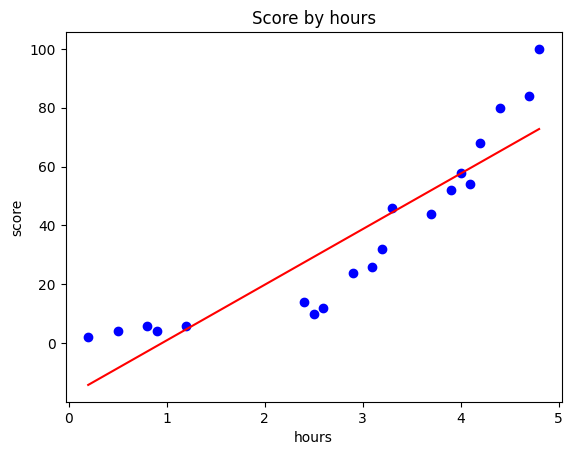

In [18]:
plt.scatter(x,y,color = 'blue')
plt.plot(x,y_pred, color = 'red')
plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('score')

In [56]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

mae = mean_absolute_error(y,y_pred)
mse = mean_squared_error(y,y_pred)
rmse = mean_squared_error(y,y_pred, squared=False)

print(f'MAE : {mae:.2f}')
print(f'MSE : {mse:.2f}')
print(f'RMSE : {rmse:.2f}')


MAE : 3.67
MSE : 21.50
RMSE : 4.64


In [24]:
#설명력(R-saueare)

reg.score(x,y)

0.8169296513411765

In [26]:
from sklearn.metrics import r2_score

r2_score(y,y_pred)

0.8169296513411765

In [34]:
print('3시간 공부했을 때 예상 점수', reg.predict([[3]]))

3시간 공부했을 때 예상 점수 [38.7575245]


다항회귀용 피처셋 변환: n차방정식 설정

In [36]:
#n차 방정식 설정. 다항회귀
from sklearn.preprocessing import PolynomialFeatures

poly_feat = PolynomialFeatures(degree=2)

In [37]:
x_poly = poly_feat.fit_transform(x)

In [38]:
x

,hour
0,0.2
1,0.5
2,0.8
3,0.9
4,1.2
5,2.4
6,2.5
7,2.6
8,2.9
9,3.1


In [39]:
x_poly

array([[ 1.  ,  0.2 ,  0.04],
       [ 1.  ,  0.5 ,  0.25],
       [ 1.  ,  0.8 ,  0.64],
       [ 1.  ,  0.9 ,  0.81],
       [ 1.  ,  1.2 ,  1.44],
       [ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  2.5 ,  6.25],
       [ 1.  ,  2.6 ,  6.76],
       [ 1.  ,  2.9 ,  8.41],
       [ 1.  ,  3.1 ,  9.61],
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.3 , 10.89],
       [ 1.  ,  3.7 , 13.69],
       [ 1.  ,  3.9 , 15.21],
       [ 1.  ,  4.  , 16.  ],
       [ 1.  ,  4.1 , 16.81],
       [ 1.  ,  4.2 , 17.64],
       [ 1.  ,  4.4 , 19.36],
       [ 1.  ,  4.7 , 22.09],
       [ 1.  ,  4.8 , 23.04]])

In [40]:
from sklearn.linear_model import LinearRegression

poly_reg = LinearRegression()

In [41]:
poly_reg.fit(x_poly, y)

LinearRegression()

In [42]:
print('기울기',poly_reg.coef_)
print('절편',poly_reg.intercept_)

기울기 [  0.         -15.06470165   6.7801135 ]
절편 10.059870742609625


In [49]:
print(f'예측치: y =  {poly_reg.coef_[0]:.2f}x^0 + {poly_reg.coef_[1]:.2f}x^1 + {poly_reg.coef_[2]:.2f}x^2 + {poly_reg.intercept_:.2f}')

예측치: y =  0.00x^0 + -15.06x^1 + 6.78x^2 + 10.06


In [50]:
#도출된 선형회귀 예측모델에 x값을 투입해 y예측값 도출

y_pred = poly_reg.predict(x_poly)
y_pred

array([ 7.31813495,  4.22254829,  2.34738206,  1.99353119,  1.74559219,
       12.95804052, 14.77382597, 16.72521368, 23.39299046, 28.51618632,
       31.28118766, 34.18179127, 47.1402284 , 54.43306058, 58.28288008,
       62.26830185, 66.38932588, 75.03818077, 89.02848012, 93.96311777])

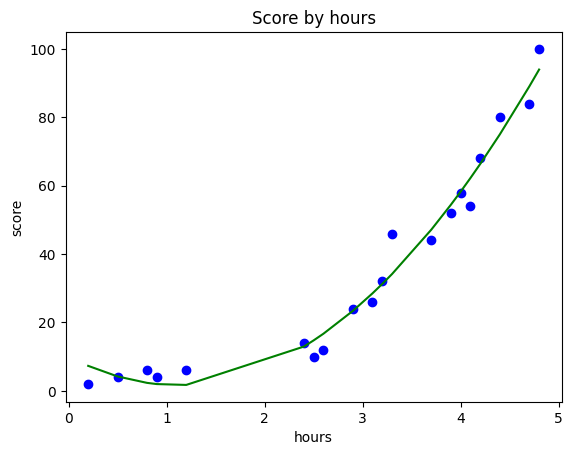

In [52]:
plt.scatter(x, y, color = 'blue') # 산점도
plt.plot(x, y_pred, color = 'green') # 선 그래프
plt.title('Score by hours') # 제목
plt.xlabel('hours') # X 축 이름
plt.ylabel('score') # Y 축 이름
plt.show()

In [53]:
# 라이브러리 이용
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = mean_squared_error(y, y_pred, squared = False)

print('회귀예측식 평균절대오차(MAE): %0.3f' % mae)
print('회귀예측식 평균제곱오차(MSE): %0.3f' % mse)
print('회귀예측식 평균제곱근오차(RMSE): %0.3f' % rmse)

회귀예측식 평균절대오차(MAE): 3.671
회귀예측식 평균제곱오차(MSE): 21.503
회귀예측식 평균제곱근오차(RMSE): 4.637


In [54]:
# 라이브러리 이용
from sklearn.metrics import r2_score

r2_score(y, y_pred)

0.9755457185555199